In [ ]:
# Mounting Gdrive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.mirrors.pair.com/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!df -h 
!tar -xvf spark-2.4.5-bin-hadoop2.7.tgz

!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   32G   71G  31% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.9G     0  5.9G   0% /dev/shm
tmpfs           6.4G   12K  6.4G   1% /var/colab
/dev/sda1       114G   33G   82G  29% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive           108G   41G   68G  38% /content/drive


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Setting the working Directory
os.chdir("/content/drive/")
!ls

'My Drive'  'Shared drives'


In [ ]:
# read data
#load ratings data from the MovieLens dataset, each row consisting of a user, a movie, a rating and a timestamp
raw_data = spark.read.csv("/content/drive/My Drive/Colab_Datasets/raw.csv",header = True)


In [ ]:
raw_data.show(5)

+--------------------+--------------------+-------------------+------------+----------------+----------------------+----+---+------------------+----------+----------------------+------------+-------------------------+--------------------------+------------------------------+-------------------------------------+-------------------+---------------------+------------------------+-------------------------+-----------------------------+------------------------------------+--------------------+
|             trip_id|trip_start_timestamp| trip_end_timestamp|trip_seconds|      trip_miles|dropoff_community_area|fare|tip|additional_charges|trip_total|shared_trip_authorized|trips_pooled|dropoff_centroid_latitude|dropoff_centroid_longitude|dropoff_centroid_location.type|dropoff_centroid_location.coordinates|pickup_census_tract|pickup_community_area|pickup_centroid_latitude|pickup_centroid_longitude|pickup_centroid_location.type|pickup_centroid_location.coordinates|dropoff_census_tract|
+---------

In [ ]:
columns_to_drop = ['dropoff_centroid_location.type','dropoff_centroid_location.coordinates','pickup_centroid_location.type',
                   'pickup_centroid_location.coordinates']
raw2= raw_data.drop(*columns_to_drop)

In [ ]:
raw3 = raw2.na.drop()
raw3.count()

1210905

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
## Subsetting our variables

geo_cols = [
            'trip_seconds', 
            'fare', 'dropoff_centroid_latitude',
       'dropoff_centroid_longitude', 'pickup_centroid_latitude',
       'pickup_centroid_longitude',
       'trip_miles',
       'trips_pooled']
geo_data = raw3.select(*geo_cols)

In [ ]:
geo_data.show(3)

+----+-------------------------+--------------------------+------------------------+-------------------------+----------------+------------+
|fare|dropoff_centroid_latitude|dropoff_centroid_longitude|pickup_centroid_latitude|pickup_centroid_longitude|      trip_miles|trips_pooled|
+----+-------------------------+--------------------------+------------------------+-------------------------+----------------+------------+
|  45|            41.6636706517|            -87.5409355129|                      NA|                       NA|45.4023171060767|           2|
|  25|                       NA|                        NA|           41.9462945357|           -87.6542980837|17.2836038832714|           1|
|  10|                       NA|                        NA|           42.0096228806|           -87.6701668569|4.35413696496574|           1|
+----+-------------------------+--------------------------+------------------------+-------------------------+----------------+------------+
only showing 

In [ ]:
from pyspark.sql.functions import col
geo_data.select(*(col(c).cast("integer").alias(c) for c in geo_data.columns))

DataFrame[fare: int, dropoff_centroid_latitude: int, dropoff_centroid_longitude: int, pickup_centroid_latitude: int, pickup_centroid_longitude: int, trip_miles: int, trips_pooled: int]

In [ ]:
geo_pandas = geo_data.toPandas()

In [ ]:
geo_pandas.dtypes

trip_seconds                  object
fare                          object
dropoff_centroid_latitude     object
dropoff_centroid_longitude    object
pickup_centroid_latitude      object
pickup_centroid_longitude     object
dtype: object

In [ ]:
## Converting the columns to numeric

cols = geo_pandas.columns

geo_pandas[cols] = geo_pandas[cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
## For trip miles

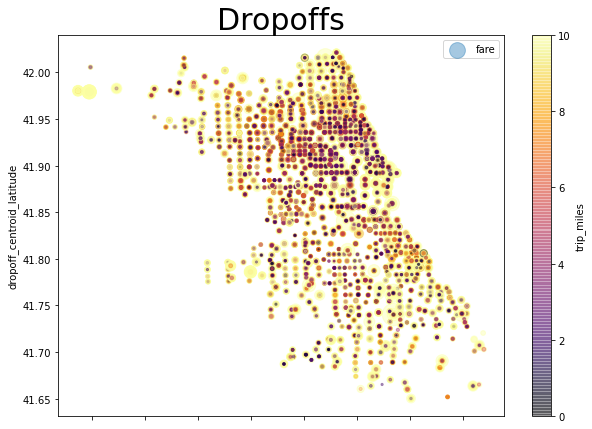

In [ ]:
geo_pandas.plot(kind="scatter", x="dropoff_centroid_longitude", y="dropoff_centroid_latitude",
    s=geo_pandas['fare'], label="fare",
    c="trip_miles", cmap=plt.get_cmap("inferno"),
    colorbar=True, alpha=0.4, figsize=(10,7),vmin=0, vmax = 10
)
plt.legend()
plt.title("Dropoffs", fontsize =30)
plt.show()

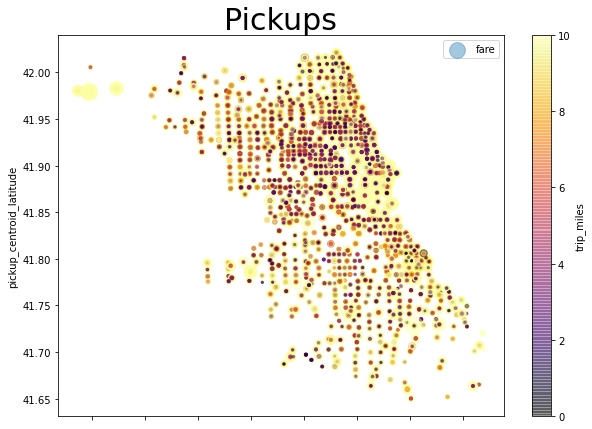

In [ ]:
geo_pandas.plot(kind="scatter", x="pickup_centroid_longitude", y="pickup_centroid_latitude",
    s=geo_pandas['fare'], label="fare",
    c="trip_miles", cmap=plt.get_cmap("inferno"),
    colorbar=True, alpha=0.4, figsize=(10,7), vmin=0, vmax = 10
)
plt.title("Pickups", fontsize =30)
plt.legend()
plt.show()

In [ ]:
## For trips pooled

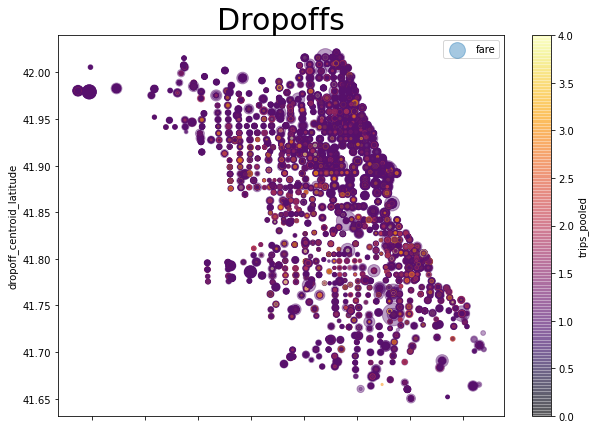

In [ ]:
geo_pandas.plot(kind="scatter", x="dropoff_centroid_longitude", y="dropoff_centroid_latitude",
    s=geo_pandas['fare'], label="fare",
    c="trips_pooled", cmap=plt.get_cmap("inferno"),
    colorbar=True, alpha=0.4, figsize=(10,7),vmin=0, vmax = 4
)
plt.legend()
plt.title("Dropoffs", fontsize =30)
plt.show()

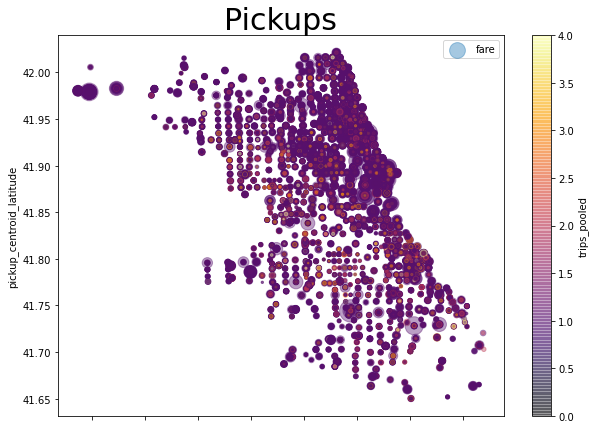

In [ ]:
geo_pandas.plot(kind="scatter", x="pickup_centroid_longitude", y="pickup_centroid_latitude",
    s=geo_pandas['fare'], label="fare",
    c="trips_pooled", cmap=plt.get_cmap("inferno"),
    colorbar=True, alpha=0.4, figsize=(10,7), vmin=0, vmax = 4
)
plt.title("Pickups", fontsize =30)
plt.legend()
plt.show()

In [ ]:
## For seconds

In [ ]:
geo_pandas.plot(kind="scatter", x="dropoff_centroid_longitude", y="dropoff_centroid_latitude",
    s=geo_pandas['fare'], label="fare",
    c="trip_seconds", cmap=plt.get_cmap("inferno"),
    colorbar=True, alpha=0.4, figsize=(10,7),vmin=0, vmax = 100
)
plt.legend()
plt.title("Dropoffs", fontsize =30)
plt.show()

In [ ]:
geo_pandas.plot(kind="scatter", x="pickup_centroid_longitude", y="pickup_centroid_latitude",
    s=geo_pandas['fare'], label="fare",
    c="trip_seconds", cmap=plt.get_cmap("inferno"),
    colorbar=True, alpha=0.4, figsize=(10,7), vmin=0, vmax = 3600
)
plt.title("Pickups", fontsize =30)
plt.legend()
plt.show()